######<h1 align="center">2° PROYECTO INDIVIDUAL: DATA ANALYTICS</h1>



# <h4 align="center"> Dentro del proyecto, trabajaremos con la **tasa de homicidios en siniestros viales** a través de un dataset de la ciudad de Buenos Aires, lo que aportará, gracias a ser una variable cuantitativa discreta, información clara y visual para el informe.</h4>







*Utilizaré algunas librerías para trabajar*

In [1]:
import pandas as pd                   # Para la manipulación y análisis de datos en Python.
import csv                            # Permite leer y escribir datos en formato csv.
import matplotlib.pyplot as plt       # Es una biblioteca de visualización en Python para crear gráficos y visualizaciones.
import openpyxl                       # Esto es útil cuando necesitas procesar datos contenidos en hojas de cálculo de Excel.
import seaborn as sns                 # Ofrece una interfaz de alto nivel para crear gráficos estadísticos atractivos y informativos.
import numpy as np

*Subo los archivos CSV a mi entorno de Google Colab utilizando la función files.upload() de la biblioteca google.colab.*

In [2]:
from google.colab import files
uploaded = files.upload()

Saving homicidios.xlsx to homicidios.xlsx


In [3]:
# Especifica la ruta del archivo Excel (.xlsx) que deseas abrir
archivo_xlsx = 'homicidios.xlsx'

# Carga el archivo Excel en un DataFrame de pandas
df_homicidios = pd.read_excel(archivo_xlsx, engine='openpyxl')

# Especifica la ruta donde deseas guardar el archivo CSV resultante
archivo_csv = 'homicidios.csv'  # Puedes cambiar el nombre y la ubicación según tus preferencias

# Guarda el DataFrame en un archivo CSV
df_homicidios.to_csv(archivo_csv, index=False)

print(f'Archivo CSV guardado en: {archivo_csv}')

Archivo CSV guardado en: homicidios.csv


*Ahora mostramos el archivo*

In [4]:
df_homicidios

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,NaN,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,NaN,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,NaN,TERRADA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,4071.0,NaN,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS


In [5]:
# Veamos la información general del archivo.
df_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

---

Estos tipos de variables nos ayudarán a comprender qué tipo de análisis y visualizaciones son apropiados para cada columna en tu conjunto de datos. Por ejemplo, las variables categóricas son adecuadas para gráficos de barras y tablas de frecuencia, mientras que las variables numéricas pueden utilizarse en gráficos de dispersión, histogramas y análisis estadísticos.

---

***COMENZAMOS CON EL ANÁLISIS ETL***

In [6]:
# Vemos si tiene datos nulos y sumamos:
df_homicidios.isnull().sum()

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64

***Podemos eliminar las filas con valores nulos***

In [7]:
# Verificar cuántos valores nulos hay en cada columna
valores_nulos = df_homicidios.isnull().sum()

# Eliminar las filas que contienen datos nulos
df_homicidios_sin_nulos = df_homicidios.dropna()

# Verificar nuevamente cuántos valores nulos hay en cada columna en el nuevo DataFrame
valores_nulos_actualizados = df_homicidios_sin_nulos.isnull().sum()

# Imprimir el número de filas eliminadas
filas_eliminadas = len(df_homicidios) - len(df_homicidios_sin_nulos)
print(f'Filas eliminadas: {filas_eliminadas}')

# Imprimir el número de valores nulos en cada columna antes y después de la eliminación
print("Valores nulos antes de la eliminación:")
print(valores_nulos)
print("\nValores nulos después de la eliminación:")
print(valores_nulos_actualizados)

Filas eliminadas: 696
Valores nulos antes de la eliminación:
ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64

Valores nulos después de la eliminación:
ID                       0.0
N_VICTIMAS               0.0
FECHA                    0.0
AAAA                     0.0
MM                       0.0
DD                       0.0
HORA                     0.0
HH                       0.0
LUGAR_DEL_HECHO          0.0
TIPO_DE_CALLE 

***Procedemos a eliminaminar columnas con datos duplicados, como detallamos en la lista a continuación ya que son irrelevantes y muchos se repiten en otras columnas.***

In [8]:
# Lista de columnas a eliminar
columnas_a_eliminar = ["Altura", "Cruce", "XY (CABA)", "Calle", 'Dirección Normalizada']

# Eliminamos las columnas especificadas
df_homicidios_modified = df_homicidios.drop(columnas_a_eliminar, axis=1)

# Mostramos las primeras filas del DataFrame resultante
df_homicidios_modified.head(4)


,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,COMUNA,pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,8,-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,9,-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,1,-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,8,-58.46503904,-34.68092974,MOTO-SD,MOTO,SD


***Una vez finalizada la transformación de las columnas, procedemos a normalizar los nombres de algunas de las mismas, para que quede más prolijo y no tengamos problemas a la hora de combinar datos y trabajr con ellos.***

In [9]:
# Crear un diccionario con los cambios de nombres
cambios_de_nombres = {
    'N_VICTIMAS': 'CANTIDAD_VICTIMAS',
    'DD': 'DIA',
    'MM': 'MES', 'DÍA': 'DIA', 'AAAA': 'ANIO',
    'pos x': 'POS X', 'pos y': 'POS Y'}

# Renombrar las columnas usando el diccionario
df_homicidios_modified.rename(columns=cambios_de_nombres, inplace=True)

# Mostraamos el dataframe con los nombres de las columnas actualizados
display(df_homicidios_modified)

,ID,CANTIDAD_VICTIMAS,FECHA,ANIO,MES,DIA,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,COMUNA,POS X,POS Y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,8,-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,9,-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,1,-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,8,-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,1,-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,7,-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,9,-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,11,-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,9,-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS


***Podemos ver que hay valores en las columnas con las siglas "SD", (sin datos según corresponda)***

In [10]:
# Encontrar en qué columnas se encuentra el valor "SD"
columns_with_sd = df_homicidios_modified.columns[df_homicidios_modified.eq('SD').any()]

# Mostrar las columnas con "SD"
print("Columnas con 'SD':")
for column in columns_with_sd:
    print(f"Columna '{column}': {df_homicidios_modified[column].isin(['SD']).sum()} veces")

Columnas con 'SD':
Columna 'HORA': 1 veces
Columna 'HH': 1 veces
Columna 'LUGAR_DEL_HECHO': 1 veces
Columna 'VICTIMA': 9 veces
Columna 'ACUSADO': 23 veces


**OBSERVACIÓN:**

------
Como podemos observar a simple vista, la cantidad de veces que figura SD en la columna 'ACUSADO', en este caso, SD sin datos sobre el vehículo del participante, es de 23 veces. Es casi el doble que en víctimas, lo cuál nos puede decir que al no haber información sobre el vehículo del acusado, podemos suponer que se dan a la fuga.

------

In [11]:
# Verifiquemos si existen duplicados en el dataframe.
duplicados = df_homicidios_modified.duplicated().sum()
print(duplicados)

0


In [12]:
# Veamos la info actualizada:
df_homicidios_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 696 non-null    object        
 1   CANTIDAD_VICTIMAS  696 non-null    int64         
 2   FECHA              696 non-null    datetime64[ns]
 3   ANIO               696 non-null    int64         
 4   MES                696 non-null    int64         
 5   DIA                696 non-null    int64         
 6   HORA               696 non-null    object        
 7   HH                 696 non-null    object        
 8   LUGAR_DEL_HECHO    696 non-null    object        
 9   TIPO_DE_CALLE      696 non-null    object        
 10  COMUNA             696 non-null    int64         
 11  POS X              696 non-null    object        
 12  POS Y              696 non-null    object        
 13  PARTICIPANTES      696 non-null    object        
 14  VICTIMA   

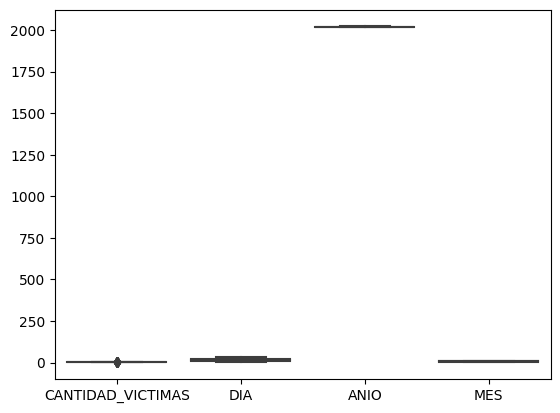

In [13]:
# Verifiquemos si existen valores atípicos en algunas columnas:
# Selecciona las dos columnas que deseas analizar
select_columns_outliers = ["CANTIDAD_VICTIMAS", "DIA", "ANIO", "MES", "LUGAR_DEL_HECHO"]
df_homicidios_modified_outliers = df_homicidios_modified[select_columns_outliers]

# Crea un box plot para visualizar los outliers de las columnas seleccionadas
sns.boxplot(data=df_homicidios_modified_outliers)
plt.show()

------
**El valor atípico de 2000 en la columna ANIO se refiere al año en que ocurrieron los homicidios. Este valor atípico es inusual porque la mayoría de los homicidios en el conjunto de datos ocurrieron en los años 2010 y 2020.**

**Hay varias posibles explicaciones para este valor atípico. Una posibilidad es que se trate de un error de entrada de datos. Otra posibilidad es que se trate de homicidios que ocurrieron antes del año 2000, pero que fueron registrados incorrectamente.**

**Es importante tener en cuenta este valor atípico al analizar los datos de homicidios. Si se trata de un error de entrada de datos, puede afectar la precisión de los análisis.**

------

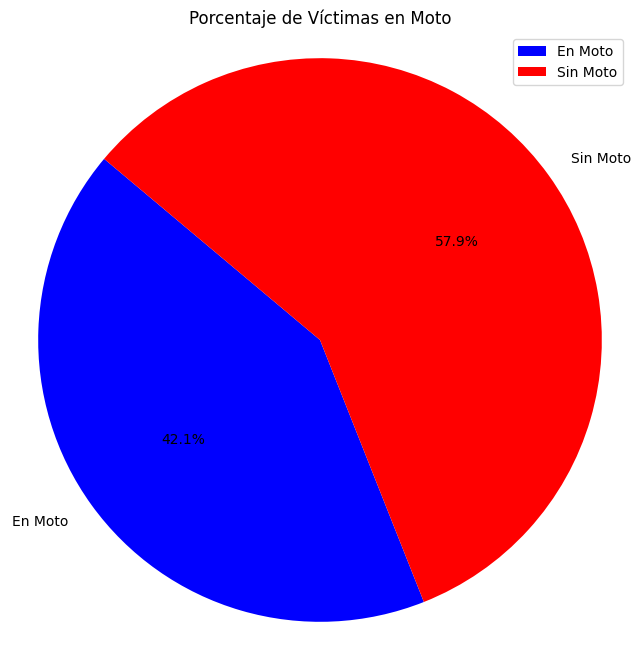

In [14]:
# Filtremos las filas donde las víctimas estaban en moto
victimas_en_moto = df_homicidios_modified[df_homicidios_modified['VICTIMA'] == 'MOTO']

# Contar el número de víctimas en moto
num_victimas_en_moto = victimas_en_moto['CANTIDAD_VICTIMAS'].sum()

# Contar el número de víctimas que no estaban en moto (para el etiquetado)
num_victimas_sin_moto = df_homicidios_modified[df_homicidios_modified['VICTIMA'] != 'MOTO']['CANTIDAD_VICTIMAS'].sum()

# Crear una lista con los valores para el gráfico
valores = [num_victimas_en_moto, num_victimas_sin_moto]

# Etiquetas para las secciones del gráfico
etiquetas = ['En Moto', 'Sin Moto']

# Colores para las secciones del gráfico
colores = ['#0000FF', '#FF0000']

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(valores, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de Víctimas en Moto')
plt.legend(etiquetas, loc='upper right')
plt.axis('equal')

# Para asegurarse de que el gráfico sea un círculo

# Mostrar el gráfico
plt.show()


------
**Esto significa que aproximadamente 58 de cada 100 accidentes de tránsito en Argentina involucran a una motocicleta. El porcentaje de accidentes sin moto es de 42,1 %, lo que significa que aproximadamente 42 de cada 100 accidentes de tránsito no involucran a una motocicleta.**
**Hay varias razones por las que los accidentes en moto son más frecuentes que los accidentes sin moto. Una razón es que las motos son más difíciles de controlar que los automóviles. Las motos tienen un centro de gravedad más bajo que los automóviles, lo que las hace más susceptibles a volcarse. Además, las motos tienen menos protección para los ocupantes que los automóviles, lo que aumenta el riesgo de lesiones graves o la muerte en caso de accidente.**

**Otra razón por la que los accidentes en moto son más frecuentes es que los motociclistas suelen ser más jóvenes y menos experimentados que los conductores de automóviles. Los motociclistas jóvenes son más propensos a cometer errores que los conductores de automóviles experimentados, lo que aumenta el riesgo de accidente.**

------

**Hay una serie de cosas que se pueden hacer para reducir el número de accidentes en moto, incluyendo:**

**Mejorar la educación y la formación de los motociclistas.
Desarrollar motocicletas más seguras.
Mejorar la infraestructura vial para los motociclistas.
Al tomar medidas para reducir los accidentes en moto, podemos ayudar a proteger a los motociclistas y a otros usuarios de la carretera.**

Exploremos y visualicemos la cantidad de víctimas en un periodo de años.

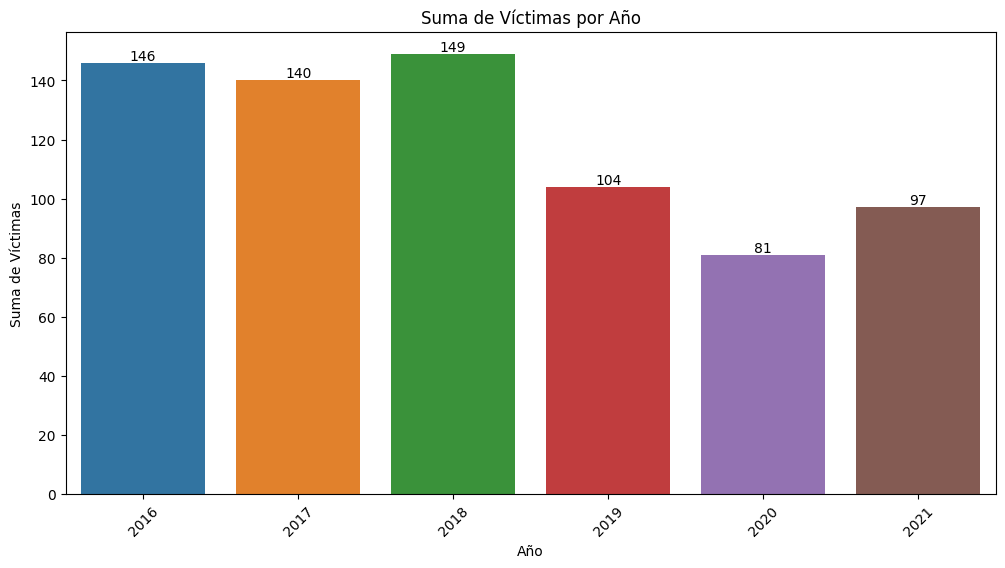

In [15]:
# Extraemos el año de la columna 'FECHA'
df_homicidios_modified['ANIO'] = df_homicidios_modified['FECHA'].dt.year

# Calcular la suma de víctimas por año
suma_victimas_por_ano = df_homicidios_modified.groupby('ANIO')['CANTIDAD_VICTIMAS'].sum().reset_index()

# Crear el barplot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=suma_victimas_por_ano, x='ANIO', y='CANTIDAD_VICTIMAS', errorbar=None)
plt.xlabel('Año')
plt.ylabel('Suma de Víctimas')
plt.title('Suma de Víctimas por Año')
plt.xticks(rotation=45)

# Agregar etiquetas de datos en las barras
for barra, cantidad in zip(ax.patches, suma_victimas_por_ano['CANTIDAD_VICTIMAS']):
    altura = barra.get_height()
    ax.annotate(f'{cantidad}', (barra.get_x() + barra.get_width() / 2, altura),
                ha='center', va='bottom')

plt.show()

Se observa durante el periodo 2016-2018 la tasa de accidentes es mayor que en el 2019-2020 debido a la causa común de COVID-19, y cuarentena obligatoria. Dado éste factor, los accidentes se redujeron en esos años.

Ahora, si analizamos por mes, tendremos más información. Veamos.

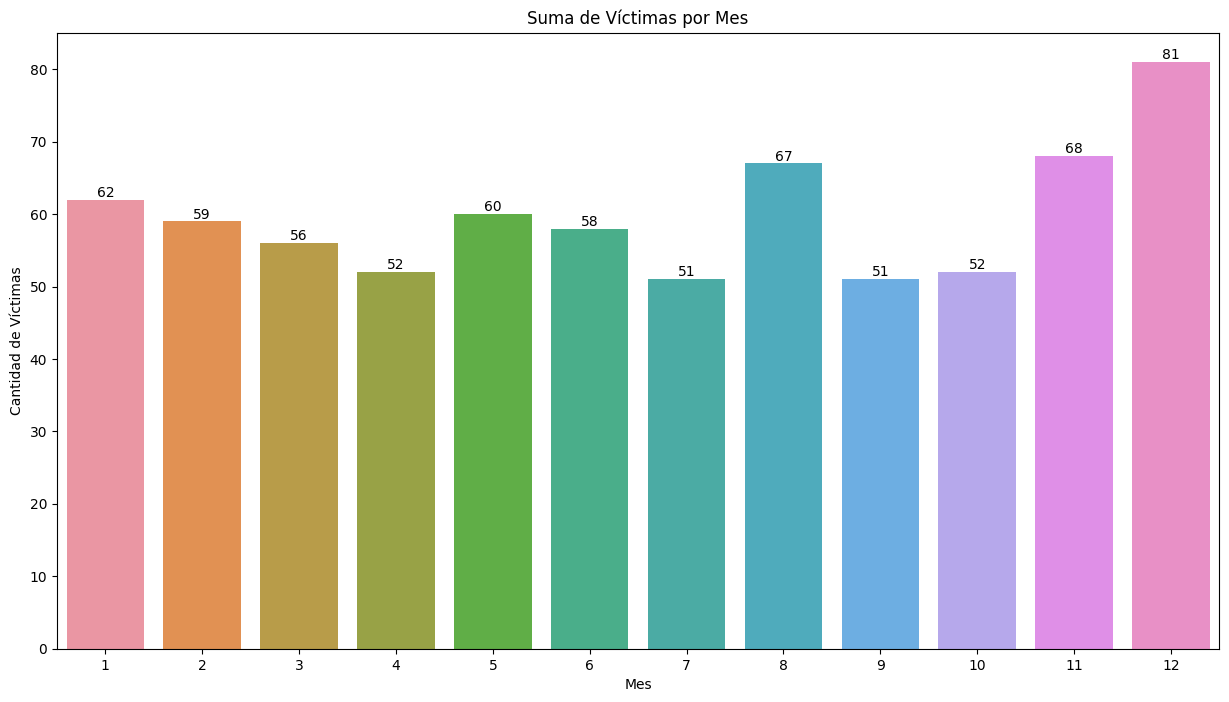

In [16]:
# Extrae el mes de la columna 'FECHA'
df_homicidios_modified['MES'] = df_homicidios_modified['FECHA'].dt.month

# Agrupa por mes y calcula la suma de 'CANTIDAD_VICTIMAS'
suma_victimas_por_mes = df_homicidios_modified.groupby('MES')['CANTIDAD_VICTIMAS'].sum().reset_index()

# Crea un barplot para la suma de víctimas por mes
plt.figure(figsize=(15, 8))
ax = sns.barplot(data=suma_victimas_por_mes, x='MES', y='CANTIDAD_VICTIMAS', errorbar=None)
plt.xlabel('Mes')
plt.ylabel('Cantidad de Víctimas')
plt.title('Suma de Víctimas por Mes')

# Agrega etiquetas de datos en las barras
for barra, cantidad in zip(ax.patches, suma_victimas_por_mes['CANTIDAD_VICTIMAS']):
    altura = barra.get_height()
    ax.annotate(f'{cantidad}', (barra.get_x() + barra.get_width() / 2, altura),
                ha='center', va='bottom')

plt.show()

En noviembre y diciembre podemos concluir que son los meses con mayor cantidad de accidentes, debido a fin de año, particularmente en diciembre, con fechas festivas como navidad y la celebración de año nuevo, donde hay mayor consumo de alcohol e imprudencias en los conductores.

**Por último y no menos importante, analizaremos la franja horaria donde se producen los accidentes:**

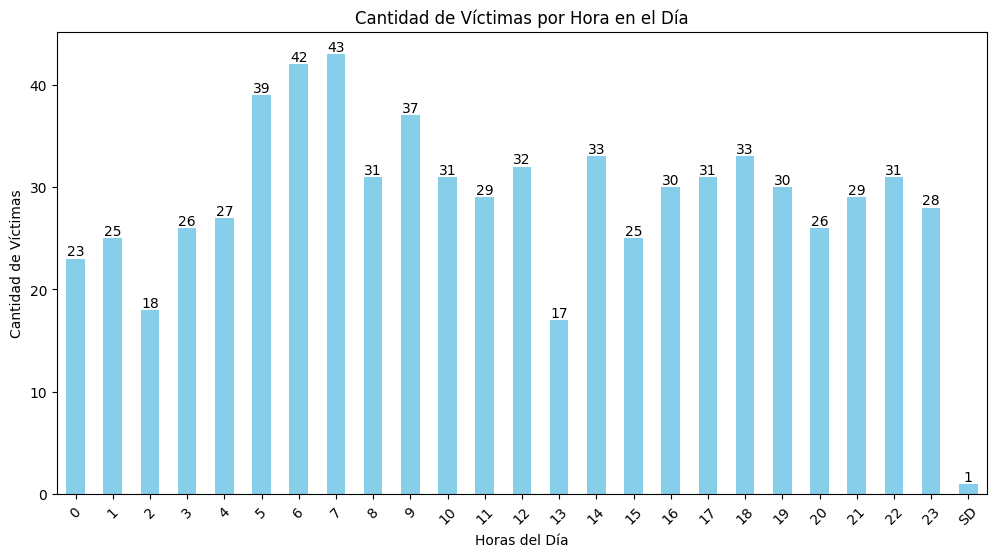

In [17]:

# Crear un gráfico de barras utilizando la columna 'HH' ya que muestra las horas del día sin carácteres que puedan complicar el gráfico.
plt.figure(figsize=(12, 6))
df_homicidios_modified.groupby('HH')['CANTIDAD_VICTIMAS'].sum().plot(kind='bar', color='skyblue')
plt.xlabel('Horas del Día')
plt.ylabel('Cantidad de Víctimas')
plt.title('Cantidad de Víctimas por Hora en el Día')
plt.xticks(rotation=45)

# Agregar etiquetas de datos en las barras
for i, v in enumerate(df_homicidios_modified.groupby('HH')['CANTIDAD_VICTIMAS'].sum()):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

---
**La franja horaria donde se visualizan mayor cantidad de víctimas, es entre las 5 y las 7 am. Puede deberse al mayor tránsito debido al previo horario laboral y a las condiciones de pocas horas de sueño o mal descansado de cada conductor. Otro motivo puede deberse a aquellos conductores imprudentes que manejan bajo efectos del alcohol o estupefacientes, recientemente salidos de fiesta o algún evento recreativo.**

**Observemos que tenemos 1 valor con SD, el cuál es despreciable a comparación de la otra información.**

---


**Exploremos en qué tipo de calles se producen más accidentes:**

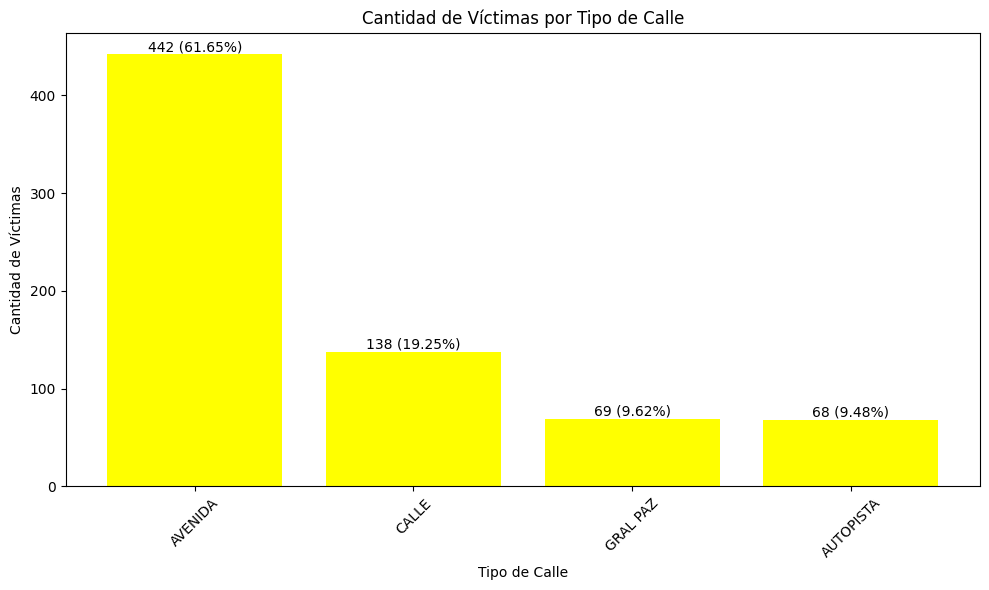

In [18]:
# Calculemos la suma de víctimas por tipo de calle
suma_victimas_por_tipo_calle = df_homicidios_modified.groupby('TIPO_DE_CALLE')['CANTIDAD_VICTIMAS'].sum().reset_index()

# Ordenar el DataFrame por la suma de víctimas de mayor a menor
suma_victimas_por_tipo_calle = suma_victimas_por_tipo_calle.sort_values(by='CANTIDAD_VICTIMAS', ascending=False)

# Calcular el porcentaje de cada barra en relación con el total de datos
total_victimas = suma_victimas_por_tipo_calle['CANTIDAD_VICTIMAS'].sum()
suma_victimas_por_tipo_calle['Porcentaje'] = (suma_victimas_por_tipo_calle['CANTIDAD_VICTIMAS'] / total_victimas) * 100

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(suma_victimas_por_tipo_calle['TIPO_DE_CALLE'], suma_victimas_por_tipo_calle['CANTIDAD_VICTIMAS'])
plt.xlabel('Tipo de Calle')
plt.ylabel('Cantidad de Víctimas')
plt.title('Cantidad de Víctimas por Tipo de Calle')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para una mejor legibilidad

plt.bar(suma_victimas_por_tipo_calle['TIPO_DE_CALLE'], suma_victimas_por_tipo_calle['CANTIDAD_VICTIMAS'], color='yellow')

# Agregar etiquetas de datos en las barras con el porcentaje
for i, (v, p) in enumerate(zip(suma_victimas_por_tipo_calle['CANTIDAD_VICTIMAS'], suma_victimas_por_tipo_calle['Porcentaje'])):
    plt.text(i, v, f'{v} ({p:.2f}%)', ha='center', va='bottom')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

**Podemos evidenciar que el 61.73% de los eventos ocurrió en una avenida, debido a la complejidad del tipo de calle y la imprudencia de los conductores, sumando los efectos secundarios que podrían haber llevado a cabo los accidentes de víctimas mortales, como estar bajo efectos de alcohol o estupefacientes que alteren el buen juicio a la hora de conducir, o bien manejar utilizando el celular.**

**Veamos el tipo de víctima más afectado en los accidentes mortales:**


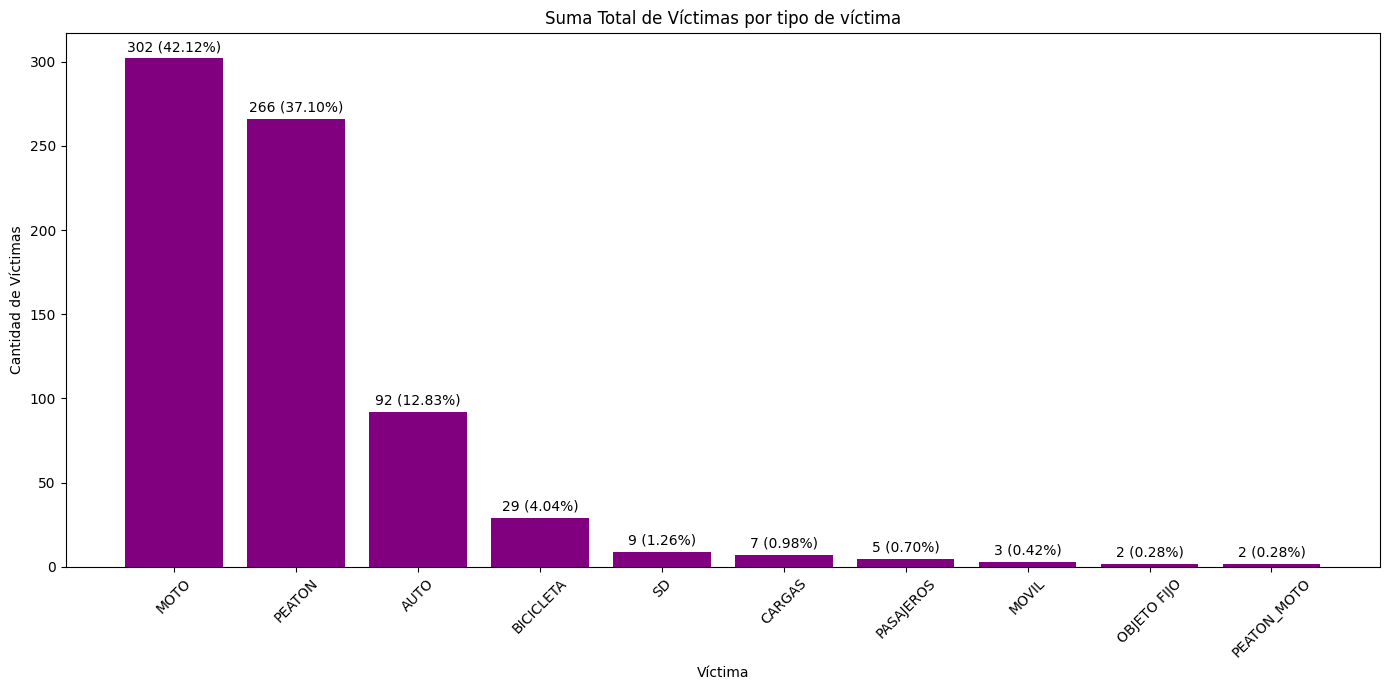

In [19]:
# Agrupemos por la columna 'VICTIMA' y calcular la suma de víctimas
suma_victimas_por_victima = df_homicidios_modified.groupby('VICTIMA')['CANTIDAD_VICTIMAS'].sum().reset_index()

# Ordenar el DataFrame por la suma de víctimas de mayor a menor
suma_victimas_por_victima = suma_victimas_por_victima.sort_values(by='CANTIDAD_VICTIMAS', ascending=False)

# Calcular el porcentaje de cada barra en relación con el total de datos
total_victimas = suma_victimas_por_victima['CANTIDAD_VICTIMAS'].sum()
suma_victimas_por_victima['Porcentaje'] = (suma_victimas_por_victima['CANTIDAD_VICTIMAS'] / total_victimas) * 100

# Crear el gráfico de barras
plt.figure(figsize=(14, 7))
bars = plt.bar(suma_victimas_por_victima['VICTIMA'], suma_victimas_por_victima['CANTIDAD_VICTIMAS'], color='purple')
plt.xlabel('Víctima')
plt.ylabel('Cantidad de Víctimas')
plt.title('Suma Total de Víctimas por tipo de víctima')
plt.xticks(rotation=45)

# Agregar etiquetas de datos en las barras con alineación y espaciado
for i, (bar, p) in enumerate(zip(bars, suma_victimas_por_victima['Porcentaje'])):
    height = bar.get_height()
    plt.annotate(f'{int(height)} ({p:.2f}%)', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # Ajustar espaciado vertical
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

------
**Claramente la evidencia que los accidentes a los conductores de motos son los más afectados, debido a la baja seguridad que tiene el vehículo y poca maniobrabilidad y los peatones. Esto es un problema grave, ya que estas son las dos categorías de usuarios más vulnerables en la vía pública.**

**Por otro lado, En primer lugar, los peatones no tienen la protección que ofrecen los vehículos, por lo que son más susceptibles a sufrir lesiones graves o mortales en caso de impacto. En segundo lugar, los motociclistas suelen circular a altas velocidades y con poca protección, lo que también aumenta el riesgo de lesiones graves o mortales en caso de accidente.**

**Para reducir el número de víctimas en los accidentes de tránsito, es necesario tomar medidas para proteger a los peatones y los motociclistas. Estas medidas pueden incluir:**

**1) Mejorar la infraestructura vial para proteger a los peatones, como la construcción de aceras y pasos peatonales seguros.**

**2) Impulsar el uso de cascos y otros equipos de protección para los motociclistas.**

**3) Reducir la velocidad máxima de los vehículos en zonas urbanas.**

**4) Incrementar la educación vial para los conductores.**

**Es importante tomar medidas para proteger a los peatones y los motociclistas, ya que son los usuarios más vulnerables en la vía pública. Estas medidas pueden ayudar a reducir el número de víctimas en los accidentes de tránsito y hacer que nuestras ciudades sean más seguras para todos.**

------

***Ahora visualizamos la hoja "VICTIMAS" del archivo homicidios, y realizaremos el EDA.***

In [20]:
archivo_excel = 'homicidios.xlsx'
nombre_hoja = 'VICTIMAS'

# Crea un objeto ExcelFile para el archivo Excel
xls = pd.ExcelFile(archivo_excel)

# Lee la hoja "VICTIMAS" en un DataFrame
df_victimas = pd.read_excel(xls, sheet_name=nombre_hoja)

# Ahora puedes trabajar con el DataFrame df_victimas que contiene la hoja "VICTIMAS"
df_victimas

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00


In [21]:
# Veamos la info general del archivo
df_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


In [22]:
# Verificar cuántos valores nulos hay en cada columna
df_victimas.isnull().sum()

ID_hecho               0
FECHA                  0
AAAA                   0
MM                     0
DD                     0
ROL                    0
VICTIMA                0
SEXO                   0
EDAD                   0
FECHA_FALLECIMIENTO    0
dtype: int64

***Podemos ver que no tiene archivos nulos***.

In [23]:
# Verifiquemos si existen valores duplicados:
df_victimas.duplicated().sum()

0

In [24]:
# Renombrar la columna "AAAA" a "ANIO"
df_victimas = df_victimas.rename(columns={'AAAA': 'ANIO'})

# Renombrar la columna "MM" a "MES"
df_victimas = df_victimas.rename(columns={'MM': 'MES'})

# Renombrar la columna "DD" a "DÍA"
df_victimas = df_victimas.rename(columns={'DD': 'DIA'})

# Renombrar la columna "ID_hecho" a "ID_HECHO"
df_victimas = df_victimas.rename(columns={'ID_hecho': 'ID_HECHO'})


In [25]:
display(df_victimas)

,ID_HECHO,FECHA,ANIO,MES,DIA,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00


In [26]:
# Convertimos el formato de la columna fecha:
df_victimas['FECHA'] = pd.to_datetime(df_victimas['FECHA'])

In [27]:
df_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_HECHO             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   ANIO                 717 non-null    int64         
 3   MES                  717 non-null    int64         
 4   DIA                  717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


In [28]:
# También observamos valores con "SD". Con el mismo código, encontramos en qué columnas se encuentra el valor "SD"
columns_with_sd = df_victimas.columns[df_victimas.eq('SD').any()]

# Mostrar las columnas con "SD"
print("Columnas con 'SD':")
for column in columns_with_sd:
    print(f"Columna '{column}': {df_victimas[column].isin(['SD']).sum()} veces")

Columnas con 'SD':
Columna 'ROL': 11 veces
Columna 'VICTIMA': 9 veces
Columna 'SEXO': 6 veces
Columna 'EDAD': 53 veces
Columna 'FECHA_FALLECIMIENTO': 68 veces


***INFO DEL DF: tipos de variables de las columnas***

*   1) ID_HECHO: Variable categórica (object).
*   2) FECHA: Variable de fecha y hora (datetime64[ns]).
*   4) MES: Variable numérica discreta (int64).
*   5) DÍA: Variable numérica discreta (int64).
*   6) ROL: Variable categórica (object).
*   7) VICTIMA: Variable categórica (object).
*   8) SEXO: Variable categórica (object).
*   9) EDAD: Variable categórica (object).
*  10) FECHA DE FALLECIMIENTO: Variable categórica (object).

---
Al igual que el df anterior, diferenciar las mismas, ayudan a determinar qué tipo de análisis y visualizaciones son apropiados para cada columna.

---














***Graficamos para visualizar un poco la información de cuál es el medio más frecuente de accidentes***

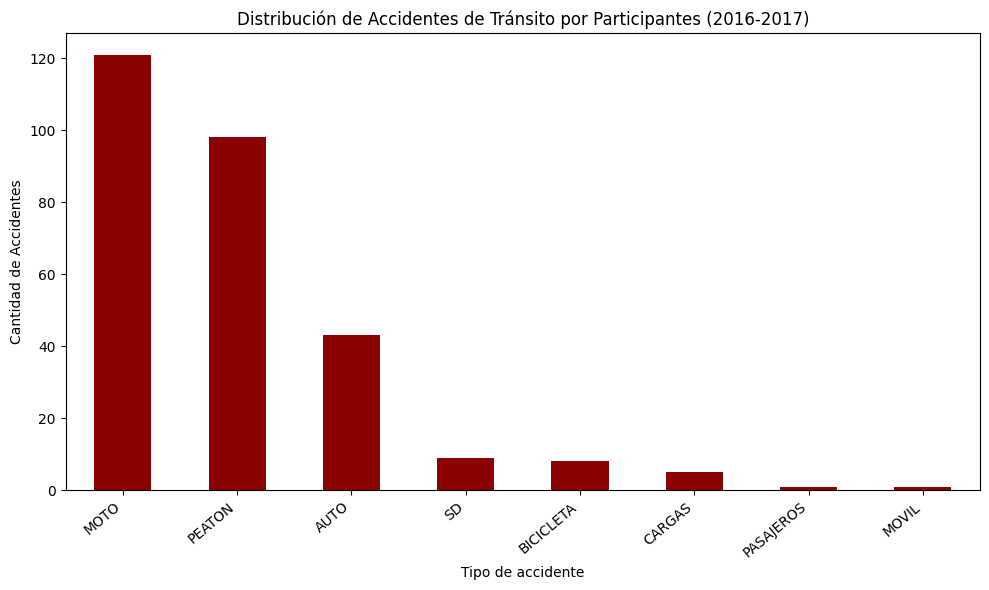

In [29]:
# Filtrar el DataFrame para el lapso de 2016 a 2017
df_lapso = df_victimas[(df_victimas['FECHA'] >= '2016-01-01') & (df_victimas['FECHA'] <= '2017-12-31')]

# Contar los valores únicos en la columna "PARTICIPANTES"
conteo_participantes = df_lapso['VICTIMA'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
conteo_participantes.plot(kind='bar', color='darkred')
plt.title('Distribución de Accidentes de Tránsito por Participantes (2016-2017)')
plt.xlabel('Tipo de accidente')
plt.ylabel('Cantidad de Accidentes')
plt.xticks(rotation=40, ha="right")

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Podemos observar que en el lapso de 1 año, los accidentes de tránsito en moto, superan los 100 eventos.
Según un estudio reciente, los accidentes de motocicleta son mucho más costosos que los accidentes de coche, tanto en términos de vidas perdidas como de gastos médicos.

Citaré 4 puntos claves referido a por qué los accidentes en moto son más frecuentes.

1. Las motocicletas son menos visibles. Debido a que las motocicletas son mucho más pequeñas que los automóviles tradicionales, es más probable que sean golpeadas por otro vehículo. Con demasiada frecuencia, los motociclistas son atropellados cuando otro conductor intenta cambiar de carril porque el motociclista estaba en el punto ciego del conductor.

2. Las motocicletas son menos estables. La configuración de dos ruedas de una motocicleta carece de la estabilidad de la base de cuatro ruedas de un automóvil, lo que los hace más susceptibles a perder el equilibrio en curvas cerradas. Tener solo dos ruedas también hace que las motocicletas sean vulnerables a la superficie sobre la que conducen. La estabilidad del terreno es muy importante; un bache podría conducir a un incidente fatal.

3. Los motociclistas pueden tener menos visibilidad. Sin ventanas significa que no hay limpiaparabrisas. Cuando llueve, los motociclistas no tienen una visibilidad clara, lo que aumenta la probabilidad de un accidente.

4. Las motocicletas no tienen cinturones de seguridad. Cuando los motociclistas son atropellados por otra persona en la carretera, es muy probable que salgan despedidos de la bicicleta. Sin cinturones de seguridad, sus cuerpos quedan a merced del pavimento y otros vehículos***.***



---
##### **FUENTE DE INORMACIÓN ADICIONAL: https://www.carlsonabogados.com/news-and-update/son-las-motocicletas-peligrosas/**
---



***Determinación de valores atípicos u outliers***:

Visualización con Boxplot

Puedemos utilizar un gráfico de boxplot para visualizar outliers de manera efectiva. Un boxplot muestra la distribución de los datos y destaca los valores atípicos como puntos individuales fuera de los "bigotes" del gráfico.

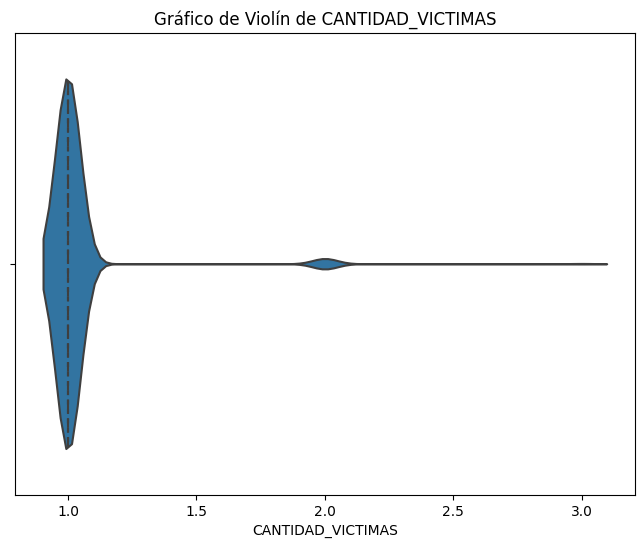

In [30]:
# Seleccionar la columna con datos numéricos para graficar outliers
columna_numerica = 'CANTIDAD_VICTIMAS'

# Crear un gráfico de violín para identificar outliers
plt.figure(figsize=(8, 6))
sns.violinplot(x=df_homicidios_modified[columna_numerica], inner="quart")
plt.title(f'Gráfico de Violín de {columna_numerica}')
plt.xlabel(columna_numerica)
plt.show()

**Analicemos el rol según la víctima para este archivo.**

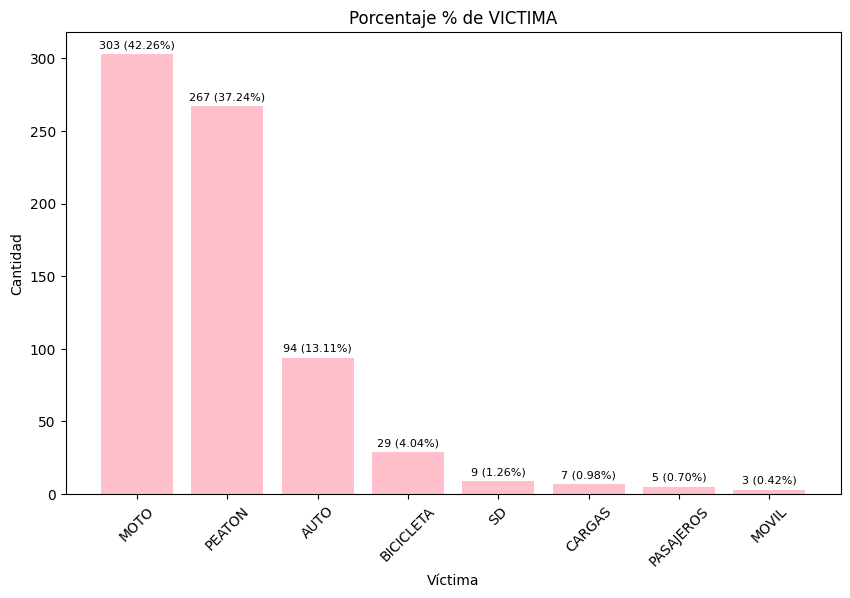

In [31]:
# Agrupar por la columna "VICTIMA" y contar la cantidad de ocurrencias en cada categoría
conteo_por_victima = df_victimas['VICTIMA'].value_counts().reset_index()

# Renombrar las columnas
conteo_por_victima.columns = ['VICTIMA', 'Cantidad']

# Calcular el porcentaje
conteo_por_victima['Porcentaje'] = (conteo_por_victima['Cantidad'] / conteo_por_victima['Cantidad'].sum()) * 100

# Crear un gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))

# Agregar las barras
ax.bar(conteo_por_victima['VICTIMA'], conteo_por_victima['Cantidad'], color='pink')

# Agregar las etiquetas del eje x
ax.set_xlabel('Víctima')
ax.set_xticks(conteo_por_victima['VICTIMA'])
ax.set_xticklabels(conteo_por_victima['VICTIMA'], rotation=45)

# Agregar las etiquetas del eje y
ax.set_ylabel('Cantidad')

# Agregar el título del gráfico
ax.set_title('Porcentaje % de VICTIMA')

# Agregar las etiquetas de datos de cantidad y porcentaje
for i, (bar, p) in enumerate(zip(ax.patches, conteo_por_victima['Porcentaje'])):
    height = bar.get_height()
    ax.annotate(f'{int(height)} ({p:.2f}%)', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # Ajustar espaciado vertical
                textcoords="offset points",
                ha='center', va='bottom', fontsize=8)

plt.show()


**Claramente las estadísticas se repiten para el archivo 'víctimas' ya que los más afectados son las motos y los peatones.**

**Realicemos un análisis de acuerdo al sexo de la víctima:**

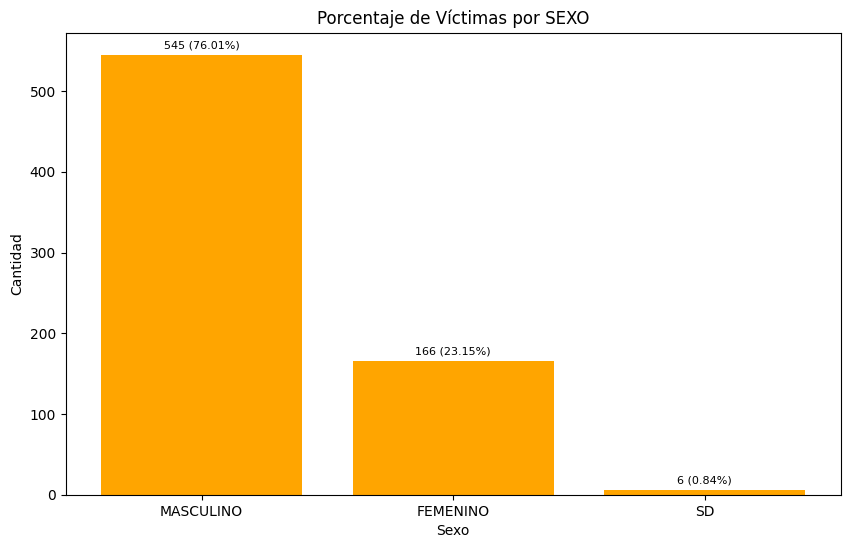

In [32]:
# Agrupar por la columna "SEXO" y contar la cantidad de ocurrencias en cada categoría
conteo_por_sexo = df_victimas['SEXO'].value_counts().reset_index()

# Renombrar las columnas
conteo_por_sexo.columns = ['SEXO', 'Cantidad']

# Calcular el porcentaje
conteo_por_sexo['Porcentaje'] = (conteo_por_sexo['Cantidad'] / conteo_por_sexo['Cantidad'].sum()) * 100

# Crear un gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(conteo_por_sexo['SEXO'], conteo_por_sexo['Cantidad'], color='orange')

# Agregar las etiquetas del eje x
ax.set_xlabel('Sexo')
ax.set_xticks(conteo_por_sexo['SEXO'])
ax.set_xticklabels(conteo_por_sexo['SEXO'])

# Agregar las etiquetas del eje y
ax.set_ylabel('Cantidad')

# Agregar el título del gráfico
ax.set_title('Porcentaje de Víctimas por SEXO')

# Agregar las etiquetas de datos de cantidad y porcentaje
for i, (bar, p) in enumerate(zip(ax.patches, conteo_por_sexo['Porcentaje'])):
    height = bar.get_height()
    ax.annotate(f'{int(height)} ({p:.2f}%)', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # Ajustar espaciado vertical
                textcoords="offset points",
                ha='center', va='bottom', fontsize=8)

plt.show()


---
**Se visualiza que las víctimas masculinas, superan por el 30% al sexo femenino.**

En primer lugar, los hombres son más propensos a conducir que las mujeres. Según la Organización Mundial de la Salud, los hombres representan el 70% de todos los conductores del mundo.

En segundo lugar, los hombres suelen conducir de forma más agresiva que las mujeres. Esto los pone en mayor riesgo de accidentes, especialmente accidentes de alta velocidad.

En tercer lugar, los hombres suelen llevar menos protección que las mujeres cuando conducen. Esto los pone en mayor riesgo de lesiones graves o mortales en caso de accidente.

Para reducir el número de víctimas masculinas en los accidentes de tránsito, es necesario abordar las causas subyacentes de este problema. Esto incluye trabajar para promover la seguridad vial, reducir los estereotipos de género y promover la igualdad de género en la conducción.

---

**Analicemos más datos sobre las víctimas:**:


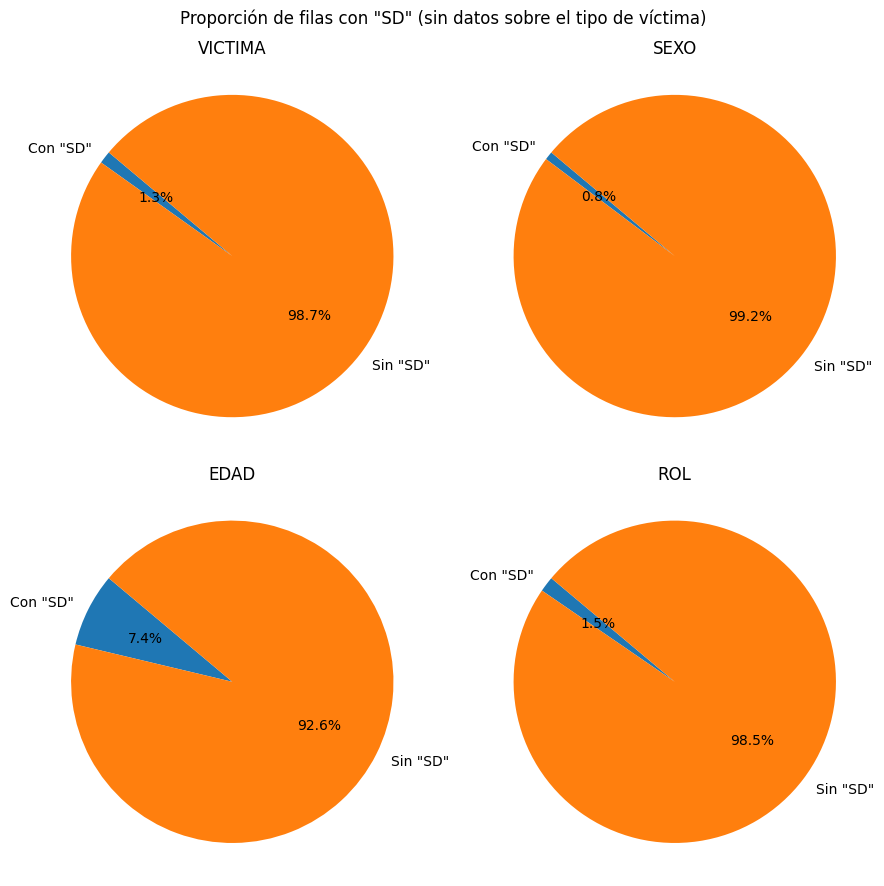

In [33]:
# Analizaremos las siguientes columnas que pueden aportarnos algunos datos de calidad.
columns = ['VICTIMA','SEXO','EDAD', 'ROL']

# Creamos los gráficos
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9,9))

for i, col in enumerate(columns):

    proporcion_SD = (df_victimas[col] == 'SD').mean() # Calculamos la proporción de filas que contienen 'SD'

    # Datos que utilizará el gráfico
    labels = ['Con "SD"', 'Sin "SD"']
    sizes = [proporcion_SD, 1 - proporcion_SD]

    # Asignamos el subgráfico correspondiente
    ax = axes[i // 2, i % 2]

    # Crear el gráfico de torta
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'{col}')
    ax.axis('equal')  # Asegura que el gráfico sea un círculo.

# Título general
fig.suptitle('Proporción de filas con "SD" (sin datos sobre el tipo de víctima)')

#  Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

**Como podemos ver, en cada columna con su respectivo "SD", nos encontramos con % diferentes y en las 4 analizadas, contamos con un mayor porcentaje con sin SD debido a varias causas posibles.**
**Podría deberse a la complejidad del accidente o la calidad de los datos, a la hora de la recopilación de los mismos.**

**Por último, analicemos la edad de las víctimas:**

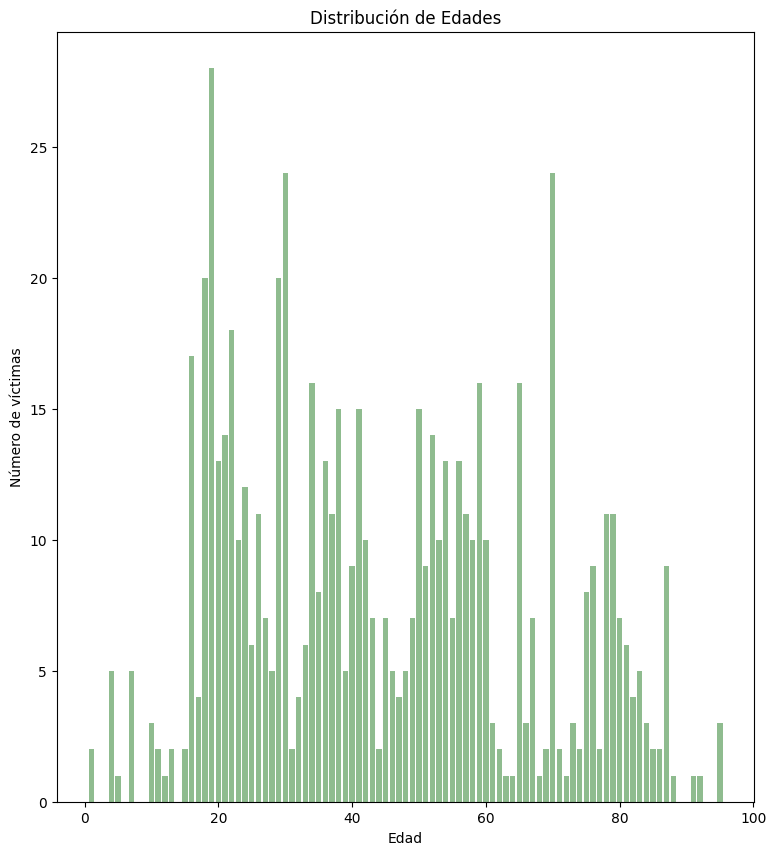

In [34]:
# Filtramos las víctimas con datos de edad. La condición de filtro es que la columna EDAD no sea igual a la cadena SD.
df_edad = df_victimas[df_victimas['EDAD'] != 'SD']

# Crear las etiquetas de las barras
etiquetas_barras = df_edad['EDAD'].unique()

# Crear los valores de las barras
valores_barras = df_edad['EDAD'].value_counts().to_list()

# Crear el diagrama de barras
fig = plt.figure(figsize=(9, 10))
plt.bar(etiquetas_barras, valores_barras, color='#8FBC8F')

# Agregar títulos y etiquetas
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Número de víctimas')

# Mostrar el gráfico
plt.show()


**El gráfico muestra que la mayoría de las víctimas de accidentes de tránsito tienen entre 20 y 50 años de edad. La edad más común de las víctimas es 30 años.**
**Qusiera agregar una conclusión para éste análisis, donde probablemente, los jóvenes de 16 a 30 años, manejen cierto tipo de imprudencia al cruzar los semáforos, confiándose de que por estár la luz en rojo, los vehículos deben frenar y no  miran hacia la vía de circulación, donde pueden llevarse a cabo accidentes mortales, debido a conductores que avancen con el semáforo en rojo y no respeten la prioridad del peatón al cruzar la calle. Por otro lado, está la imprudencia del peatón al no cruzar por la senda peatonal, donde puede verse comprometido su cruce hacia la vereda del otro lado del camino.**

**INSIGHT:**
**Ésto mejoraría severamente tomando consciencia, a cerca de la situación y de la gravedad que implica cruzar una calle o avenida sin mirar hacia la vía de circulación, e incluso, hacia todas las direcciones posibles, donde puedan circular vehículos.**

**Realicemos una observación y veamos si existen valore atípicos en la columna EDAD:**

<ipython-input-44-c78737be22a1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_victimas['EDAD'] = df_victimas['EDAD'].astype(int)


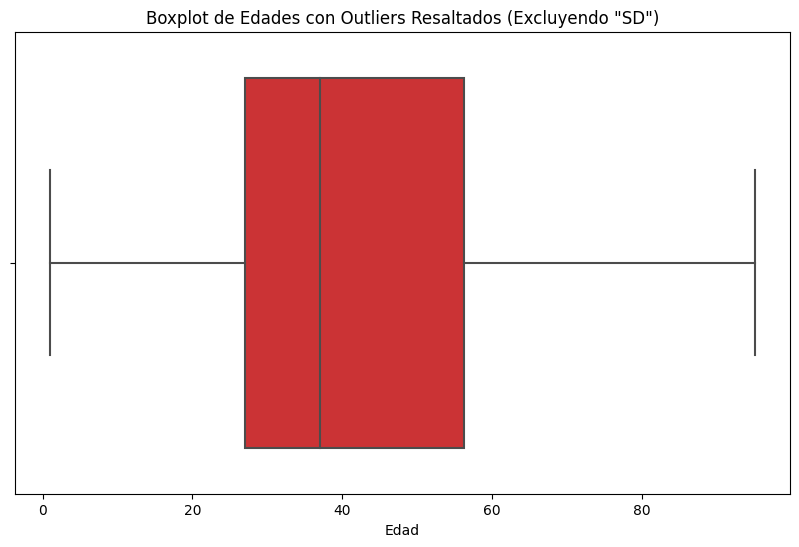

In [44]:
# Convertir la columna 'EDAD' a tipo int, excluyendo los valores 'SD'
df_victimas = df_victimas[df_victimas['EDAD'] != 'SD']  # Eliminar las filas con 'SD'
df_victimas['EDAD'] = df_victimas['EDAD'].astype(int)

# Calcular los límites superior e inferior para identificar outliers
q1 = df_victimas['EDAD'].quantile(0.25)
q3 = df_victimas['EDAD'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtrar los outliers
outliers = df_victimas[(df_victimas['EDAD'] < lower_bound) | (df_victimas['EDAD'] > upper_bound)]

# Crear un gráfico de caja (boxplot) para visualizar outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='EDAD', data=df_victimas, palette='Set1')
plt.title('Boxplot de Edades con Outliers Resaltados (Excluyendo "SD")')
plt.xlabel('Edad')
plt.show()


---
En este caso, donde los valores están encerrados en la caja entre 25 y 55 años, y hay posiblemente outliers fuera de esta gama, podemos hacer algunas interpretaciones:

**Mediana y Cuartiles (Q1 y Q3):**

La línea en medio de la caja representa la mediana (50º percentil), que está alrededor de los 40 años.
La caja en sí abarca desde el primer cuartil (Q1) al tercer cuartil (Q3), es decir, el 25º al 75º percentil. En este caso, la caja va aproximadamente desde los 30 hasta los 50 años.

**Rango Intercuartílico (IQR):**

El IQR es la distancia entre Q1 y Q3, en este caso, alrededor de 20 años.

**Outliers:**

Cualquier punto fuera de los "bigotes" (líneas que se extienden desde la caja) se considera un posible outlier. En este gráfico, los outliers se representan como puntos individuales fuera de los bigotes.
Con estas interpretaciones, podríamos decir que la mayoría de las edades están concentradas entre los 30 y los 50 años, siendo 40 años la mediana. La presencia de outliers sugiere que hay algunas edades atípicas en el conjunto de datos, que pueden ser valores inusuales o errores en los datos. La interpretación exacta de los outliers dependerá de la naturaleza específica del conjunto de datos y del contexto en el que se esté trabajando. Puede ser útil examinar más de cerca esos valores atípicos para entender por qué se desvían de la tendencia principal.

In [35]:
# Filtrar las víctimas con datos de edad
df_edad = df_victimas[df_victimas['EDAD'] != 'SD']

# Calculamos la edad promedio
edad_promedio = df_edad['EDAD'].mean()

print('La edad promedio de las víctimas en accidentes de tránsito es:', edad_promedio)

La edad promedio de las víctimas en accidentes de tránsito es: 42.16716867469879


La diversidad de edades de las víctimas en accidentes de tránsito puede deberse a una serie de factores:

La movilidad de la población: Las personas de todas las edades se desplazan por
las carreteras, ya sea para ir al trabajo, a la escuela, a realizar actividades recreativas o por cualquier otro motivo.

Las diferentes actividades que realizan las personas de diferentes edades: Las personas de diferentes edades realizan diferentes actividades, algunas de las cuales conllevan un mayor riesgo de sufrir un accidente de tránsito.

Por ejemplo, los jóvenes suelen conducir más que los adultos mayores, y los niños suelen ser pasajeros en vehículos conducidos por adultos.

Los diferentes hábitos de seguridad vial: Las personas de diferentes edades pueden tener diferentes hábitos de seguridad vial, lo que puede aumentar el riesgo de sufrir un accidente. Por ejemplo, los jóvenes pueden ser más propensos a conducir bajo los efectos del alcohol o de las drogas, y los adultos mayores pueden ser más propensos a ignorar las señales de tránsito.

En el caso específico del gráfico, la diversidad de edades de las víctimas parece deberse principalmente a la movilidad de la población. El gráfico muestra que la mayoría de las víctimas tienen entre 20 y 50 años, que es la edad en la que las personas suelen estar más activas y desplazarse más por las carreteras.

A continuación se presentan algunos ejemplos específicos de cómo los factores mencionados anteriormente pueden contribuir a la diversidad de edades de las víctimas en accidentes de tránsito:

Un joven que conduce a exceso de velocidad y se estrella contra un árbol.
Un adulto mayor que se cruza la calle sin mirar y es atropellado por un automóvil.
Un niño que viaja en un automóvil con un adulto que está conduciendo bajo los efectos del alcohol.

Es importante tener en cuenta que la diversidad de edades de las víctimas en accidentes de tránsito es un problema global. Según la Organización Mundial de la Salud, los accidentes de tránsito son la principal causa de muerte entre las personas de 15 a 29 años.

---

**Convertimos los dataframes a formato csv:**

**ARCHIVO HOMICIDIOS:**

In [36]:
# Ahora procedemos a convertir el archivo "HOMICIDIOS" a csv
df_homicidios_modified.to_csv('df_homicidios_modified.csv')

In [37]:
# Descargamos el archivo:
files.download('df_homicidios_modified.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**ARCHIVO VICTIMAS:**

In [38]:
# Ahora procedemos a convertir el archivo "VICTIMAS" a csv
df_victimas.to_csv('df_victimas.csv')

In [39]:
# Descargamos el archivo:
files.download('df_victimas.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>